In [3]:
from __future__ import division
import numpy as np
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from numpy import linalg as LA
from Functions import Dic_Books_Year,Out_Degree
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit



In [4]:
df_Se13 = pd.read_json('data_without100/se13.json', lines=True).sort_values(by='sourceYear')
df_Se14 = pd.read_json('data_without100/se14.json', lines=True).sort_values(by='sourceYear')

df_sameyear_se13 = df_Se13[df_Se13['sourceYear'] == df_Se13['targetYear']] 
df_Se13.drop(df_sameyear_se13.index, inplace=True)

df_sameyear_se14 = df_Se14[df_Se14['sourceYear'] == df_Se14['targetYear']] 
df_Se14.drop(df_sameyear_se14.index, inplace=True)

df_list = [df_Se13, df_Se14]
df = pd.concat(df_list)


In [17]:
df_Se15 = pd.read_json('data_without100/Se15.json', lines=True).sort_values(by='sourceYear')
df_sameyear_Se15 = df_Se15[df_Se15['sourceYear'] == df_Se15['targetYear']] 
df_Se15.drop(df_sameyear_Se15.index, inplace=True)


In [18]:
df_Se16 = pd.read_json('data_without100/Se16.json', lines=True).sort_values(by='sourceYear')
df_sameyear_Se16 = df_Se16[df_Se16['sourceYear'] == df_Se16['targetYear']] 
df_Se16.drop(df_sameyear_Se16.index, inplace=True)


In [19]:
df_Se17 = pd.read_json('data_without100/Se17.json', lines=True).sort_values(by='sourceYear')
df_sameyear_Se17 = df_Se17[df_Se17['sourceYear'] == df_Se17['targetYear']] 
df_Se17.drop(df_sameyear_Se17.index, inplace=True)


In [28]:
df_Se19 = pd.read_json('data_without100/Se19.json', lines=True).sort_values(by='sourceYear')
df_sameyear_Se19 = df_Se19[df_Se19['sourceYear'] == df_Se19['targetYear']] 
df_Se19.drop(df_sameyear_Se19.index, inplace=True)
df_Se19.head(2)

sourceID  sourceYear  targetID  targetYear  \
0      1905        1624      1933        1650   

                                   kindOfEdgeLabel  edgeParameter  \
0  se19_influencedBySameOriginalPart_AdaptionsOnly            207   

  source_book_location target_book_location source_book_format  \
0                Paris               Madrid        Sextodecimo   

  target_book_format  
0             Quarto

In [21]:
def make_link(row: 'rows contain id of source and targets'):
    return (row[0],row[1])
df_Se13['links']=df_Se13[['sourceID','targetID']].apply(make_link,axis=1)
df_Se14['links']=df_Se14[['sourceID','targetID']].apply(make_link,axis=1)
df_Se15['links']=df_Se15[['sourceID','targetID']].apply(make_link,axis=1)
df_Se16['links']=df_Se16[['sourceID','targetID']].apply(make_link,axis=1)
df_Se17['links']=df_Se17[['sourceID','targetID']].apply(make_link,axis=1)
df_Se19['links']=df_Se19[['sourceID','targetID']].apply(make_link,axis=1)

Books_Se13 = list(set(list(df_Se13['sourceID'])+list(df_Se13['targetID'])))
Books_Se14 = list(set(list(df_Se14['sourceID'])+list(df_Se14['targetID'])))
Books_Se15 = list(set(list(df_Se15['sourceID'])+list(df_Se15['targetID'])))
Books_Se16 = list(set(list(df_Se16['sourceID'])+list(df_Se16['targetID'])))
Books_Se17 = list(set(list(df_Se17['sourceID'])+list(df_Se17['targetID'])))
Books_Se19 = list(set(list(df_Se19['sourceID'])+list(df_Se19['targetID'])))

print('Se13', '#links:',len(set(df_Se13['links'])), '#Nodes',len(Books_Se13))
print('Se14', '#links:',len(set(df_Se14['links'])), '#Nodes',len(Books_Se14))
print('Se15', '#links:',len(set(df_Se15['links'])), '#Nodes',len(Books_Se15))
print('Se16', '#links:',len(set(df_Se16['links'])), '#Nodes',len(Books_Se16))
print('Se17', '#links:',len(set(df_Se17['links'])), '#Nodes',len(Books_Se17))
print('Se19', '#links:',len(set(df_Se19['links'])), '#Nodes',len(Books_Se19))



Se13 #links: 4658 #Nodes 300
Se14 #links: 2005 #Nodes 202
Se15 #links: 18 #Nodes 22
Se16 #links: 25 #Nodes 9
Se17 #links: 90 #Nodes 40
Se19 #links: 1 #Nodes 2


In [77]:
# For Se13
Books_Se13 = list(set(list(df_Se13['sourceID'])+list(df_Se13['targetID'])))

List_Year_ID_Se13=list(zip(list(df_Se13['sourceYear']),list(df_Se13['sourceID'])))+list(zip(list(df_Se13['targetYear']),list(df_Se13['targetID'])))

Min_Y_Se13 = min(df_Se13['sourceYear'])
Max_Y_Se13 = max(df_Se13['targetYear'])

year_books_Se13 = {}
for year in range(Min_Y_Se13,Max_Y_Se13+1):

    
    List2=[]
    for item in List_Year_ID_Se13:
        if item[0]==year:
            List2.append(item[1])
    year_books_Se13[year]=list(set(List2))      
    
    
NBooks_Se13 = []
for year in range(Min_Y_Se13,Max_Y_Se13+1):
    NBooks_Se13.append(len(year_books_Se13[year]))
    

years_Se13 = []
for year in range(Min_Y_Se13,Max_Y_Se13+1):
    years_Se13.append(year)

NBooks_Se13 = np.array(NBooks_Se13)
i_t_Se13 = NBooks_Se13.cumsum()/len(Books_Se13)
S_t_Se13=len(Books_Se13)-NBooks_Se13.cumsum()
S_t_Se13=S_t_Se13/len(Books_Se13)
    
print(list(NBooks_Se13))
print(len(Books_Se13))
    
    

[1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 4, 2, 0, 2, 0, 1, 1, 1, 3, 1, 1, 1, 0, 2, 0, 1, 3, 1, 4, 3, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 3, 2, 0, 4, 0, 1, 3, 3, 0, 2, 2, 2, 3, 0, 4, 0, 3, 4, 5, 6, 7, 7, 4, 2, 1, 3, 2, 3, 2, 3, 10, 3, 3, 6, 2, 5, 3, 3, 4, 3, 2, 3, 5, 4, 2, 4, 4, 4, 3, 3, 6, 3, 4, 5, 4, 1, 3, 1, 1, 2, 4, 0, 3, 3, 2, 2, 0, 2, 0, 1, 6, 2, 2, 0, 1, 2, 6, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
300


In [76]:
# For Se14
Books_Se14 = list(set(list(df_Se14['sourceID'])+list(df_Se14['targetID'])))

List_Year_ID_Se14=list(zip(list(df_Se14['sourceYear']),list(df_Se14['sourceID'])))+list(zip(list(df_Se14['targetYear']),list(df_Se14['targetID'])))

Min_Y_Se14 = min(df_Se14['sourceYear'])
Max_Y_Se14 = max(df_Se14['targetYear'])

year_books_Se14 = {}
for year in range(Min_Y_Se14,Max_Y_Se14+1):

    
    List2=[]
    for item in List_Year_ID_Se14:
        if item[0]==year:
            List2.append(item[1])
    year_books_Se14[year]=list(set(List2))      
    
    
NBooks_Se14 = []
for year in range(Min_Y_Se14,Max_Y_Se14+1):
    NBooks_Se14.append(len(year_books_Se14[year]))
    

years_Se14 = []
for year in range(Min_Y_Se14,Max_Y_Se14+1):
    years_Se14.append(year)

NBooks_Se14 = np.array(NBooks_Se14)
i_t_Se14 = NBooks_Se14.cumsum()/len(Books_Se14)
S_t_Se14=len(Books_Se14)-NBooks_Se14.cumsum()
S_t_Se14=S_t_Se14/len(Books_Se14)
 
print(list(NBooks_Se14))
print(len(Books_Se14))
    


[1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 4, 2, 0, 3, 0, 1, 1, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 1, 3, 3, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 3, 1, 1, 0, 1, 3, 0, 2, 0, 3, 0, 5, 6, 4, 4, 1, 0, 0, 2, 1, 2, 1, 3, 5, 3, 2, 2, 1, 5, 2, 2, 3, 2, 2, 2, 3, 4, 0, 1, 3, 3, 3, 0, 3, 2, 1, 4, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 4, 2, 1, 0, 0, 2, 5, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
202


In [75]:
# For Se15
Books_Se15 = list(set(list(df_Se15['sourceID'])+list(df_Se15['targetID'])))

List_Year_ID_Se15=list(zip(list(df_Se15['sourceYear']),list(df_Se15['sourceID'])))+list(zip(list(df_Se15['targetYear']),list(df_Se15['targetID'])))

Min_Y_Se15 = min(df_Se15['sourceYear'])
Max_Y_Se15 = max(df_Se15['targetYear'])

year_books_Se15 = {}
for year in range(Min_Y_Se15,Max_Y_Se15+1):

    
    List2=[]
    for item in List_Year_ID_Se15:
        if item[0]==year:
            List2.append(item[1])
    year_books_Se15[year]=list(set(List2))      
    
    
NBooks_Se15 = []
for year in range(Min_Y_Se15,Max_Y_Se15+1):
    NBooks_Se15.append(len(year_books_Se15[year]))
    

years_Se15 = []
for year in range(Min_Y_Se15,Max_Y_Se15+1):
    years_Se15.append(year)

NBooks_Se15 = np.array(NBooks_Se15)
i_t_Se15 = NBooks_Se15.cumsum()/len(Books_Se15)
S_t_Se15=len(Books_Se15)-NBooks_Se15.cumsum()
S_t_Se15=S_t_Se15/len(Books_Se15)
    
print(list(NBooks_Se15))
print(len(Books_Se15))


[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
22


In [119]:
# For Se17
Books_Se17 = list(set(list(df_Se17['sourceID'])+list(df_Se17['targetID'])))

List_Year_ID_Se17=list(zip(list(df_Se17['sourceYear']),list(df_Se17['sourceID'])))+list(zip(list(df_Se17['targetYear']),list(df_Se17['targetID'])))

Min_Y_Se17 = min(df_Se17['sourceYear'])
Max_Y_Se17 = max(df_Se17['targetYear'])

year_books_Se17 = {}
for year in range(Min_Y_Se17,Max_Y_Se17+1):

    
    List2=[]
    for item in List_Year_ID_Se17:
        if item[0]==year:
            List2.append(item[1])
    year_books_Se17[year]=list(set(List2))      
    
    
NBooks_Se17 = []
for year in range(Min_Y_Se17,Max_Y_Se17+1):
    NBooks_Se17.append(len(year_books_Se17[year]))
    

years_Se17 = []
for year in range(Min_Y_Se17,Max_Y_Se17+1):
    years_Se17.append(year)

NBooks_Se17 = np.array(NBooks_Se17)
i_t_Se17 = NBooks_Se17.cumsum()/len(Books_Se17)
S_t_Se17=len(Books_Se17)-NBooks_Se17.cumsum()
S_t_Se17=S_t_Se17/len(Books_Se17)
    
print(list(NBooks_Se17))
print(len(Books_Se17))


[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 3, 3, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
40


In [7]:
print('i0_se13',i_t_Se13[0])
print('i0_se14',i_t_Se14[0])
print('i0_se15',i_t_Se15[0])



i0_se13 0.0033333333333333335
i0_se14 0.0049504950495049506
i0_se15 0.045454545454545456


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


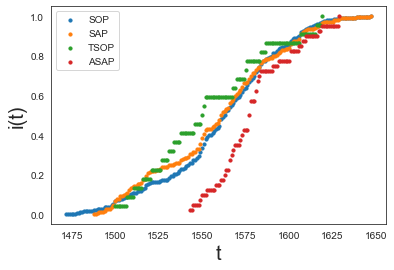

In [123]:
plt.scatter(years_Se13,i_t_Se13,s=10,label='SOP')
plt.scatter(years_Se14,i_t_Se14,s=10,label='SAP')
plt.scatter(years_Se15,i_t_Se15,s=10,label='TSOP')
plt.scatter(years_Se17,i_t_Se17,s=10,label='ASAP')

#plt.plot(years,S_t,label='s(t)')
plt.legend()
plt.ylabel('i(t)',size=20)
plt.xlabel('t',size=20)
plt.savefig('it_Se13_Se14_Se15_Se17.eps')
#plt.title('i(t) for layers Se13 and Se14')
plt.show()


In [9]:
# define the true objective function
def objective(x, L, x0, k, b):
           
    return L/(1+np.exp(-k*(x-x0)))+b
 


x = np.arange(len(i_t_Se13))
y = i_t_Se13    

p0 = [max(y),np.median(x),1,min(y)]
# curve fit
popt, pcov = curve_fit(objective, x, y,p0,method='dogbox')


popt

# summarize the parameter values
L, x0, k, b = popt

# plot input vs output
plt.scatter(x, y, label='Se13')
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, L, x0, k, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red', linewidth=3,label='fitted curve')
plt.xlabel('time')
plt.ylabel('i(t)')
plt.legend()
#plt.savefig('i_t_Se13Se14_fit')
plt.show()

print('L',float(L))
print('x0',float(x0))
print('k',float(k))
print('b',float(b))



L 1.0247372100520722
x0 92.71145875629901
k 0.047209896020663264
b 0.010039140899820408


In [79]:
(math.exp(0.047*92.71))

78.05158857082556

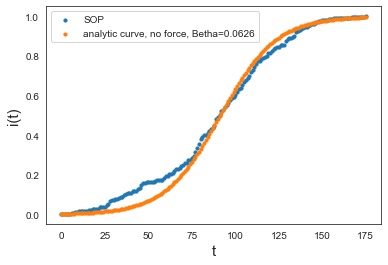

In [80]:
# 0.0626
Fit_SI = []
for t in x:
    h=0.0033*np.exp(0.0626*t)/(0.9967+(0.0033*np.exp(0.0626*t)))
    Fit_SI.append(h)
    
    
plt.scatter(x, y,s=10,label='SOP')
plt.scatter(x,Fit_SI,marker='o',s=10,label='analytic curve, no force, Betha=0.0626')   # This is with Betha = 0.0626
plt.xlabel('t',size=15)
plt.ylabel('i(t)',size=15)
plt.legend()
plt.savefig('Se13_analytic_curve_no_externalForce')
plt.show()

    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


i0 0.0033333333333333335
a 0.0004012055742339897
b 0.0493903610733349


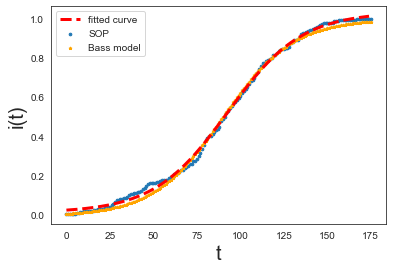

In [175]:
# In this part we find a and b values from analytical equations by considering two points of data-set
# And 

from scipy.optimize import fsolve
import math

i0=i_t_Se13[0]
#t1=x[20]
#It1=y[20]

#t2=x[127]
#It2=y[127]

t1=x[65]
It1=y[65]

t2=x[134]
It2=y[134]

print('i0',i0)

def equations(p):
    a, b = p
    return ((It1-1)*(i0*b+a)*math.exp(t1*(a+b))-((i0-1)*(b*It1+a)),(It2-1)*(i0*b+a)*math.exp(t2*(a+b))-((i0-1)*(b*It2+a)))

a, b =  fsolve(equations, (0.0003,0.06))

print('a',a)
print('b',b)

Fit = []
for t in x:
    h=((b*i0+a)*math.exp(t*(a+b))+a*(i0-1))/((b*i0+a)*math.exp(t*(a+b))-b*(i0-1))
    Fit.append(h)
    

plt.scatter(x, y, marker='o',s=7, label='SOP')
plt.plot(x_line, y_line, '--', color='red', linewidth=3,label='fitted curve')
plt.scatter(x,Fit,marker='*',s=8,c='orange',label='Bass model')   # This is with Betha = 0.0626
#plt.scatter(x,Fit_SI,marker='s',s=8,c='green',label='SI model')   # This is with Betha = 0.0626
plt.ylabel('i(t)',size=20)  
plt.xlabel('t',size=20)
plt.legend()
plt.savefig('It_Se13_FittedCurves.eps')
plt.show()


In [174]:
# Here we plot above figures for three layers and Se13 in the same plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].scatter(years_Se13,i_t_Se13, marker='o',s=10,label='SOP')
axes[0].scatter(years_Se14,i_t_Se14, marker='s',s=10,label='SAP')
axes[0].scatter(years_Se15,i_t_Se15, marker='*',s=10,label='TSOP')
axes[0].scatter(years_Se17,i_t_Se17, marker='^',s=10,label='ASAP')

axes[0].legend()
axes[0].set_title('(a)',size=15)
axes[0].set_ylabel('i(t)',size=15)
axes[0].set_xlabel('year',size=15)


axes[1].scatter(x, y, marker='o',s=11, label='SOP')
axes[1].plot(x_line, y_line, '--', color='red', linewidth=4,label=r'fitted curve $\beta=0.047$')

axes[1].scatter(x,Fit_SI, marker='.',s=7,c='y',label=r'SI model $\beta=0.062$')   # This is with Betha = 0.0626

axes[1].scatter(x,Fit,marker='*',s=10,c='green',label=r'Bass model $\beta=0.049$, $\alpha=0.0004$')   # This is with Betha = 0.044

axes[1].legend()
axes[1].set_title('(b)',size=15)
axes[1].set_ylabel('i(t)',size=15)
axes[1].set_xlabel('t',size=15)

plt.savefig('It_LayersComparison_Fitting_1.eps')
plt.show()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


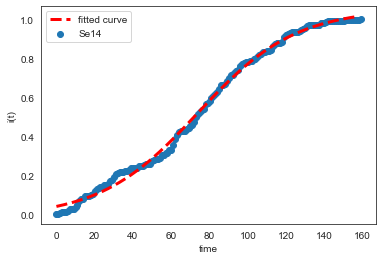

L 1.0666448011378913
x0 73.79240927595676
k 0.03913707731949847
b -0.013059317836524281


In [13]:
# define the true objective function
def objective(x, L, x0, k, b):
           
    return L/(1+np.exp(-k*(x-x0)))+b
 


x_14 = np.arange(len(i_t_Se14))
y_14 = i_t_Se14    

p0 = [max(y_14),np.median(x_14),1,min(y_14)]
# curve fit
popt, pcov = curve_fit(objective, x_14, y_14,p0,method='dogbox')


popt

# summarize the parameter values
L, x0, k, b = popt

# plot input vs output
plt.scatter(x_14, y_14, label='Se14')
# define a sequence of inputs between the smallest and largest known inputs
x_line_14 = arange(min(x_14), max(x_14), 1)
# calculate the output for the range
y_line_14 = objective(x_line_14, L, x0, k, b)
# create a line plot for the mapping function
plt.plot(x_line_14, y_line_14, '--', color='red', linewidth=3,label='fitted curve')
plt.xlabel('time')
plt.ylabel('i(t)')
plt.legend()
#plt.savefig('i_t_Se14Se14_fit')
plt.show()

print('L',float(L))
print('x0',float(x0))
print('k',float(k))
print('b',float(b))



i0 0.0049504950495049506
a--Se14 0.002379459046217018
b--Se14 0.037467110458712004


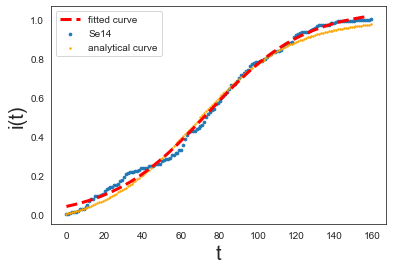

In [186]:
# In this part we find a and b values from analytical equations by considering two points of data-set
# And 

from scipy.optimize import fsolve
import math

i0=i_t_Se14[0]
t1=x_14[45]
It1=y_14[45]

t2=x_14[110]
It2=y_14[110]

print('i0',i0)

def equations(p):
    a, b = p
    return ((It1-1)*(i0*b+a)*math.exp(t1*(a+b))-((i0-1)*(b*It1+a)),(It2-1)*(i0*b+a)*math.exp(t2*(a+b))-((i0-1)*(b*It2+a)))

a, b =  fsolve(equations, (0.006,0.04))


Fit_14 = []
for t in x_14:
    h=((b*i0+a)*math.exp(t*(a+b))+a*(i0-1))/((b*i0+a)*math.exp(t*(a+b))-b*(i0-1))
    Fit_14.append(h)
    

plt.scatter(x_14, y_14,s=7, label='Se14')
plt.plot(x_line_14, y_line_14, '--', color='red', linewidth=3,label='fitted curve')
plt.scatter(x_14,Fit_14,marker='o',s=2,c='orange',label='analytical curve')   # This is with Betha = 0.0626
plt.ylabel('i(t)',size=20)  
plt.xlabel('t',size=20)
plt.legend()
print('a--Se14',a)
print('b--Se14',b)


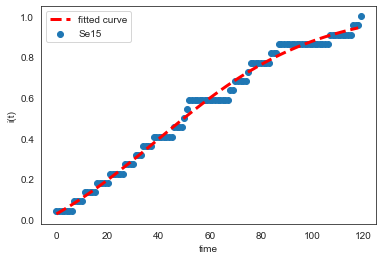

L 1.2931067903541817
x0 39.45509292203783
k 0.03218316794086811
b -0.2546324147462911


In [15]:
# define the true objective function
def objective(x, L, x0, k, b):
           
    return L/(1+np.exp(-k*(x-x0)))+b
 


x_15 = np.arange(len(i_t_Se15))
y_15 = i_t_Se15    

p0 = [max(y_15),np.median(x_15),1,min(y_15)]
# curve fit
popt, pcov = curve_fit(objective, x_15, y_15,p0,method='dogbox')


popt

# summarize the parameter values
L, x0, k, b = popt

# plot input vs output
plt.scatter(x_15, y_15, label='Se15')
# define a sequence of inputs between the smallest and largest known inputs
x_line_15 = arange(min(x_15), max(x_15), 1)
# calculate the output for the range
y_line_15 = objective(x_line_15, L, x0, k, b)
# create a line plot for the mapping function
plt.plot(x_line_15, y_line_15, '--', color='red', linewidth=3,label='fitted curve')
plt.xlabel('time')
plt.ylabel('i(t)')
plt.legend()
#plt.savefig('i_t_Se15Se15_fit')
plt.show()

print('L',float(L))
print('x0',float(x0))
print('k',float(k))
print('b',float(b))



i0 0.045454545454545456
a--Se15 0.005114384759875768
b--Se15 0.03109842911010704


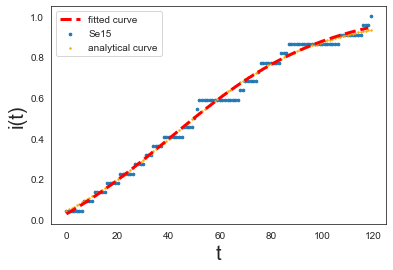

In [107]:
# In this part we find a and b values from analytical equations by considering two points of data-set
# And 

from scipy.optimize import fsolve
import math

i0=i_t_Se15[0]
t1=x_15[41]
It1=y_15[41]

t2=x_15[110]
It2=y_15[110]

print('i0',i0)

def equations(p):
    a, b = p
    return ((It1-1)*(i0*b+a)*math.exp(t1*(a+b))-((i0-1)*(b*It1+a)),(It2-1)*(i0*b+a)*math.exp(t2*(a+b))-((i0-1)*(b*It2+a)))

a, b =  fsolve(equations, (0.03, 0.0006))


Fit_15 = []
for t in x_15:
    h=((b*i0+a)*math.exp(t*(a+b))+a*(i0-1))/((b*i0+a)*math.exp(t*(a+b))-b*(i0-1))
    Fit_15.append(h)
    

plt.scatter(x_15, y_15,s=7, label='Se15')
plt.plot(x_line_15, y_line_15, '--', color='red', linewidth=3,label='fitted curve')
plt.scatter(x_15,Fit_15,marker='o',s=2,c='orange',label='analytical curve')   # This is with Betha = 0.0626
plt.ylabel('i(t)',size=20)  
plt.xlabel('t',size=20)
plt.legend()
print('a--Se15',a)
print('b--Se15',b)


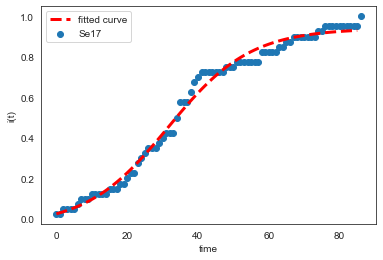

L 0.9742352690424493
x0 31.5894179917088
k 0.0861943279579582
b -0.034544268378294905


In [124]:
# define the true objective function
def objective(x, L, x0, k, b):
           
    return L/(1+np.exp(-k*(x-x0)))+b
 


x_17 = np.arange(len(i_t_Se17))
y_17 = i_t_Se17    

p0 = [max(y_17),np.median(x_17),1,min(y_17)]
# curve fit
popt, pcov = curve_fit(objective, x_17, y_17,p0,method='dogbox')


popt

# summarize the parameter values
L, x0, k, b = popt

# plot input vs output
plt.scatter(x_17, y_17, label='Se17')
# define a sequence of inputs between the smallest and largest known inputs
x_line_17 = arange(min(x_17), max(x_17), 1)
# calculate the output for the range
y_line_17 = objective(x_line_17, L, x0, k, b)
# create a line plot for the mapping function
plt.plot(x_line_17, y_line_17, '--', color='red', linewidth=3,label='fitted curve')
plt.xlabel('time')
plt.ylabel('i(t)')
plt.legend()
#plt.savefig('i_t_Se17Se17_fit')
plt.show()

print('L',float(L))
print('x0',float(x0))
print('k',float(k))
print('b',float(b))



i0 0.025
a--Se17 0.004232876175545011
b--Se17 0.06932384966447715


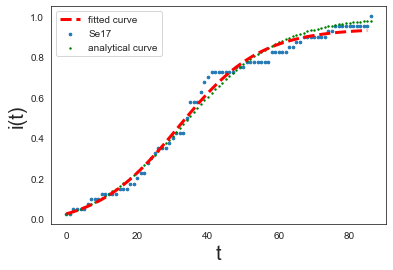

In [198]:
# In this part we find a and b values from analytical equations by considering two points of data-set
# And 

from scipy.optimize import fsolve
import math

i0=i_t_Se17[0]
t1=x_17[24]
It1=y_17[24]

t2=x_17[49]
It2=y_17[49]

print('i0',i0)

def equations(p):
    a, b = p
    return ((It1-1)*(i0*b+a)*math.exp(t1*(a+b))-((i0-1)*(b*It1+a)),(It2-1)*(i0*b+a)*math.exp(t2*(a+b))-((i0-1)*(b*It2+a)))

a, b =  fsolve(equations, (0.0006, 0.086))


Fit_17 = []
for t in x_17:
    h=((b*i0+a)*math.exp(t*(a+b))+a*(i0-1))/((b*i0+a)*math.exp(t*(a+b))-b*(i0-1))
    Fit_17.append(h)
    

plt.scatter(x_17, y_17,s=7, label='Se17')
plt.plot(x_line_17, y_line_17, '--', color='red', linewidth=3,label='fitted curve')
plt.scatter(x_17,Fit_17,marker='o',s=2,c='green',label='analytical curve')   # This is with Betha = 0.0626
plt.ylabel('i(t)',size=20)  
plt.xlabel('t',size=20)
plt.legend()
print('a--Se17',a)
print('b--Se17',b)


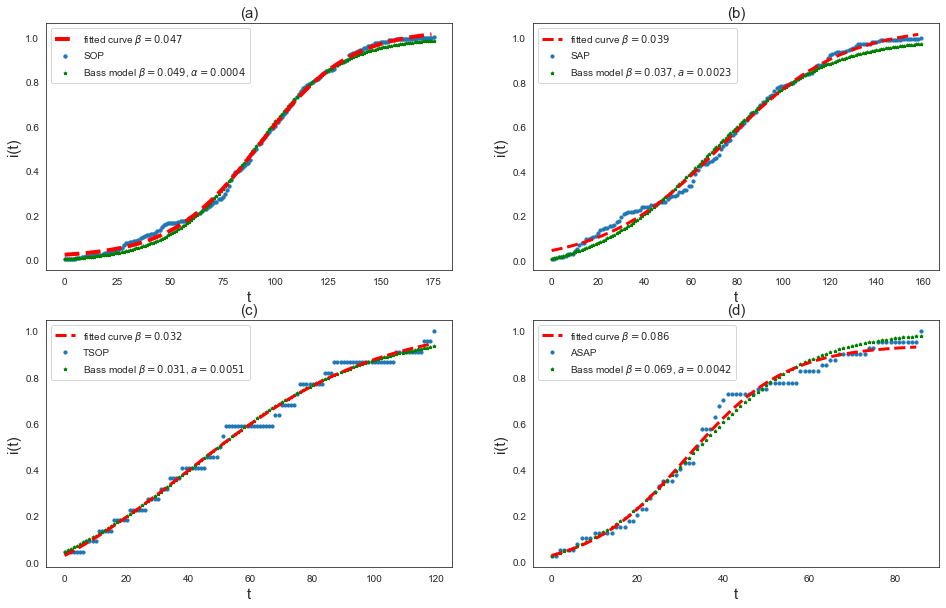

In [202]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0,0].scatter(x, y, marker='o',s=11, label='SOP')
axes[0,0].plot(x_line, y_line, '--', color='red', linewidth=4,label=r'fitted curve $\beta=0.047$')
#axes[0,0].scatter(x,Fit_SI, marker='.',s=7,c='y',label=r'SI model $\beta=0.062$')   # This is with Betha = 0.0626
axes[0,0].scatter(x,Fit,marker='*',s=10,c='green',label=r'Bass model $\beta=0.049$, $\alpha=0.0004$')   # This is with Betha = 0.044
axes[0,0].legend()
axes[0,0].set_title('(a)',size=15)
axes[0,0].set_ylabel('i(t)',size=15)
axes[0,0].set_xlabel('t',size=15)

axes[0,1].scatter(x_14, y_14, marker='o',s=10, label='SAP')
axes[0,1].plot(x_line_14, y_line_14, '--', color='red', linewidth=3,label=r'fitted curve $\beta=0.039$')
axes[0,1].scatter(x_14,Fit_14,marker='*',s=10,c='green',label=r'Bass model $\beta=0.037$, $\mathit{a}=0.0023$')   # This is with Betha = 0.0626
axes[0,1].legend()
axes[0,1].set_title('(b)',size=15)
axes[0,1].set_ylabel('i(t)',size=15)
axes[0,1].set_xlabel('t',size=15)


axes[1,0].scatter(x_15, y_15, marker='o',s=10, label='TSOP')
axes[1,0].plot(x_line_15, y_line_15, '--', color='red', linewidth=3,label=r'fitted curve $\beta=0.032$')
axes[1,0].scatter(x_15,Fit_15,marker='*',s=10,c='green',label=r'Bass model $\beta=0.031$, $\mathit{a}=0.0051$')   # This is with Betha = 0.0626
axes[1,0].legend()
axes[1,0].set_title('(c)',size=15)
axes[1,0].set_ylabel('i(t)',size=15)
axes[1,0].set_xlabel('t',size=15)

axes[1,1].scatter(x_17, y_17, marker='o',s=10, label='ASAP')
axes[1,1].plot(x_line_17, y_line_17, '--', color='red', linewidth=3,label=r'fitted curve $\beta=0.086$')
axes[1,1].scatter(x_17,Fit_17,marker='*',s=10,c='green',label=r'Bass model $\beta=0.069$, $\mathit{a}=0.0042$')   # This is with Betha = 0.0626
axes[1,1].legend()
axes[1,1].set_title('(d)',size=15)
axes[1,1].set_ylabel('i(t)',size=15)
axes[1,1].set_xlabel('t',size=15)

plt.savefig('It_Se13_Se14_Se15_Se17_Fitting.pdf')
plt.show()

